In [7]:
import classifier_wlan_utils as utils
import importlib
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
seed = 42
task = "app"
label = utils.labels[task]
num_classes = utils.classes[task]
num_classes = 6
print("Label id: ", label)
print("Num classes in that label: ", num_classes)
num_iq_seq = 10000# 500us at 20MHz BW
padding = 'post'
dataset_folder = '../../dataset/waveforms/'
load_model=False
load_dir='../../models/'
load_file = '22042020175144_saved_wavenet_classifier'

Label id:  3
Num classes in that label:  6


In [9]:
dataset_filename = 'waveforms_24042020_2G_n_6_mobile_app_full_app_6_classes_balanced.mat'
X, Y = utils.get_xy(dataset_folder,dataset_filename, num_iq_seq, padding, label, num_classes)
X_train, X_val, X_test, Y_train, Y_val, Y_test = utils.get_xy_4_training(X,Y,seed)
print(X_train.shape,X_val.shape, X_test.shape)
print(Y_train.shape,Y_val.shape, Y_test.shape)

Reading raw X and Y from file


100%|██████████| 61374/61374 [01:29<00:00, 682.06it/s]


Padding/Truncating sequence


100%|██████████| 61374/61374 [00:10<00:00, 5729.90it/s]


Oneshot labels
(42961, 2, 10000) (9206, 2, 10000) (9207, 2, 10000)
(42961, 6) (9206, 6) (9207, 6)


In [11]:
importlib.reload(utils)
kernel_size = 2
dilation_depth = 6
n_filters = 50
if load_model:
    wnc = utils.WaveNetClassifier((2,num_iq_seq), (num_classes,), kernel_size = 2, dilation_depth = dilation_depth, n_filters = n_filters, task = 'classification', regression_range = None, load = load_model, load_dir = load_dir, load_file= load_file)
else:
    wnc = utils.WaveNetClassifier((2,num_iq_seq), (num_classes,), kernel_size = 2, dilation_depth = dilation_depth, n_filters = n_filters)
    wnc.fit(X_train, Y_train, validation_data = (X_val, Y_val),save=True, epochs = 50)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
original_input (InputLayer)     (None, 2, 10000)     0                                            
__________________________________________________________________________________________________
reshaped_input (Reshape)        (None, 2, 10000, 1)  0           original_input[0][0]             
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 2, 10000, 50) 250         reshaped_input[0][0]             
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 1, 5000, 50)  10050       conv2d[0][0]                     
____________________________________________________________________________________________

In [12]:
test_results = wnc.evaluate(X_test, Y_test)
print(test_results)

9207/9207 [==============================] - 20s 2ms/step
[0.32929040651322966, 0.8900836110115051]


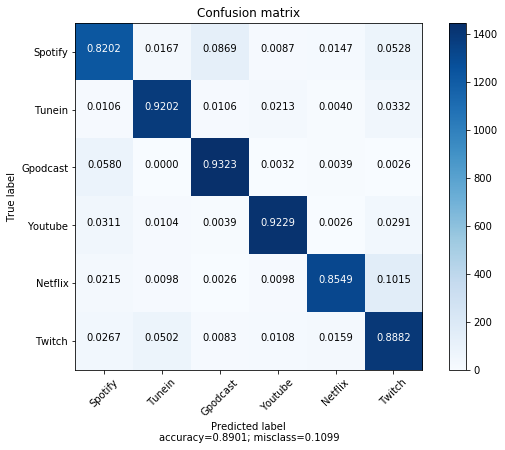

[[1227   25  130   13   22   79]
 [  16 1384   16   32    6   50]
 [  90    0 1447    5    6    4]
 [  48   16    6 1425    4   45]
 [  33   15    4   15 1314  156]
 [  42   79   13   17   25 1398]]
[[0.13326817 0.00271533 0.01411969 0.00141197 0.00238949 0.00858043]
 [0.00173781 0.15032041 0.00173781 0.00347562 0.00065168 0.00543065]
 [0.00977517 0.         0.15716303 0.00054307 0.00065168 0.00043445]
 [0.00521342 0.00173781 0.00065168 0.15477354 0.00043445 0.00488759]
 [0.00358423 0.0016292  0.00043445 0.0016292  0.1427175  0.01694363]
 [0.00456175 0.00858043 0.00141197 0.00184642 0.00271533 0.15184099]]


In [13]:
Y_pred=np.argmax(wnc.predict(X_test),1)
Y_true=np.argmax(Y_test,1)
utils.plot_confusion_matrix_mc(Y_true, Y_pred, ["Spotify", "Tunein", "Gpodcast", "Youtube", "Netflix", "Twitch"], "conf_matrix_test_app_6_classes.pdf")
print(confusion_matrix(Y_true, Y_pred))
print(confusion_matrix(Y_true, Y_pred, normalize='all'))